# Visualization of various methods to classify CrossLocate dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_clusters(df, spec=""):
    """
    Plot the clustered points based on latitude and longitude.
    """
    plt.figure(figsize=(10, 5))

    cluster_col = f"cluster_label{spec}"

    num_clusters = df[cluster_col].nunique()
    palette = sns.color_palette("husl", n_colors=num_clusters)

    sns.scatterplot(
        data=df,
        x='longitude',
        y='latitude',
        hue=cluster_col,
        palette=palette,
        s=10,
        legend=False
    )

    centers = df.groupby(cluster_col)[['longitude', 'latitude']].mean().reset_index()

    # Overlay cluster centers
    plt.scatter(
        centers['longitude'], 
        centers['latitude'], 
        color='black', 
        marker='x', 
        s=60, 
        label='Cluster Centers'
    )

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Clusters on Geolocation Data")
    plt.grid(True)
    #plt.colorbar(scatter, label="Cluster ID")

    plt.gca().set_aspect('auto')
    plt.show()

In [3]:
def plot_distribution(df, spec="", size=(12, 7)):
    """
    Plot the clustered points based on latitude and longitude.
    """
    plt.figure(figsize=size)

    class_counts = df[f"cluster_label{spec}"].value_counts().sort_index()

    bars = plt.bar(class_counts.index, class_counts.values, color="skyblue", edgecolor="blue")

    plt.xlabel("Cluster ID")
    plt.ylabel("Number of Samples")
    plt.title("Distribution of Samples per Cluster")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(class_counts.index, rotation=90)  # Show all cluster labels
    plt.tight_layout()

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8, rotation=90)

    plt.gca().set_aspect('auto')
    plt.show()

In [4]:
kmeans_csv = "../../data/kmeans_classes.csv"
osm_csv = "../../data/osm_classes.csv"
optics_csv = "../../data/optics_classes.csv"
balanced_csv = "../../data/balanced_classes.csv"

kmeans_df = pd.read_csv(kmeans_csv)
osm_df = pd.read_csv(osm_csv)
optics_df = pd.read_csv(optics_csv)
balanced_df = pd.read_csv(balanced_csv)

## KMeans

Number of classes based on kmeans: 50


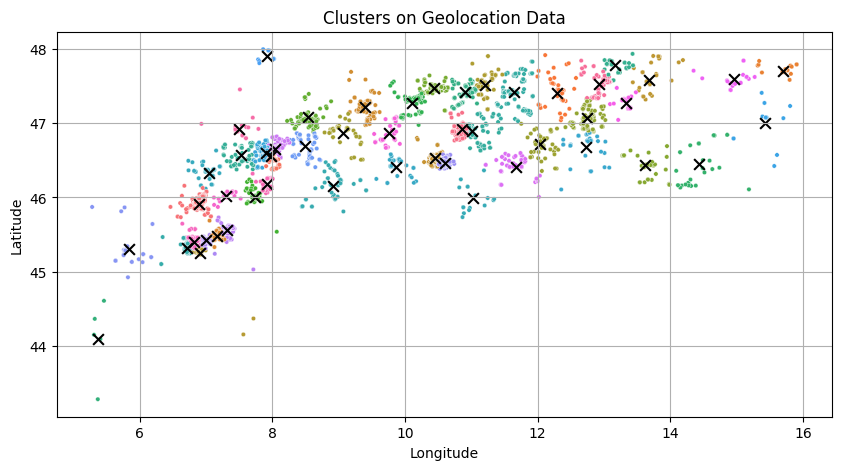

In [5]:
clusters = sorted(kmeans_df['cluster_label'].unique())
print("Number of classes based on kmeans:", len(clusters))

plot_clusters(kmeans_df)

Distribution based on kmeans


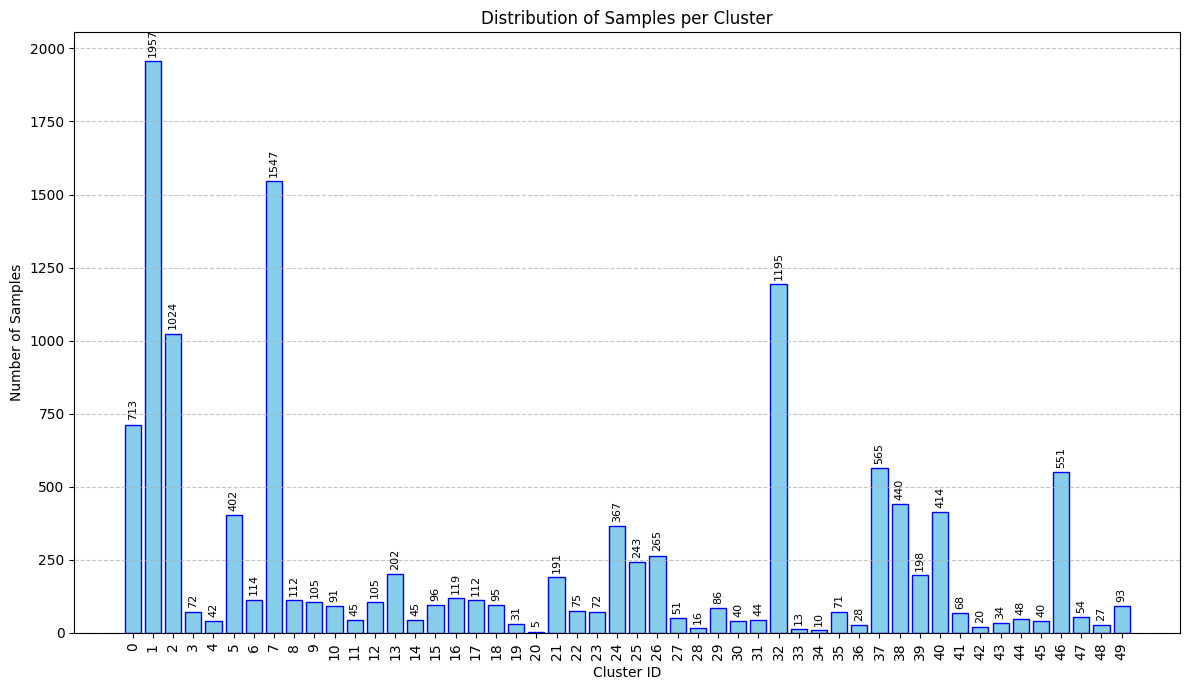

In [6]:
print("Distribution based on kmeans")
plot_distribution(kmeans_df)

## OSM (OpenStreetMap)
### Administrative region 1

Number of classes based on administrative region: 58


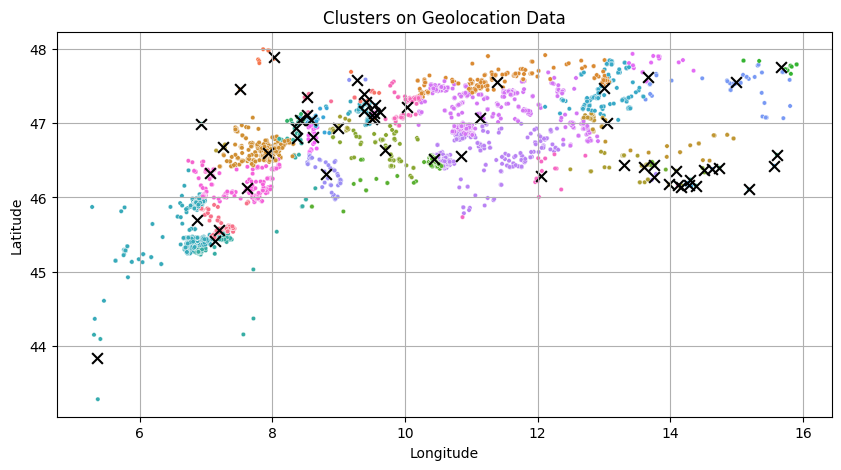

In [7]:
clusters = sorted(osm_df['cluster_label_admin1'].unique())
print("Number of classes based on administrative region:", len(clusters))
plot_clusters(osm_df, "_admin1")


Distribution based on OSM, administrative region


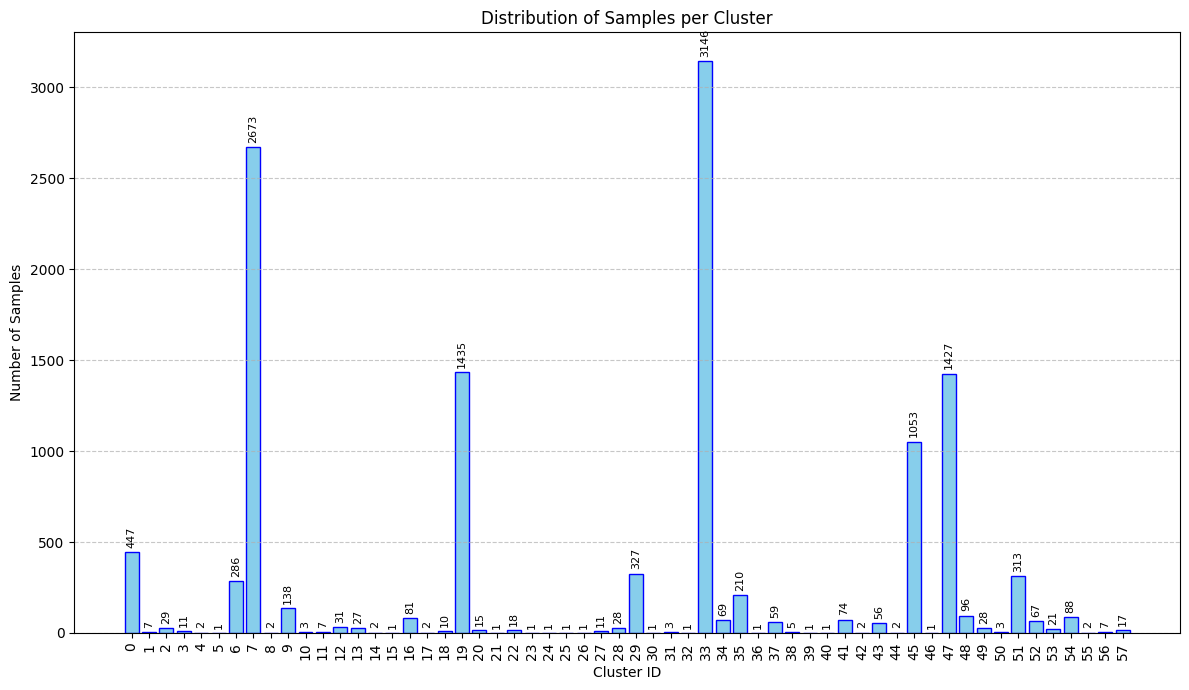

In [8]:
print("Distribution based on OSM, administrative region")
plot_distribution(osm_df, spec="_admin1")

### Administrative region 2

Number of classes based on administrative region: 127


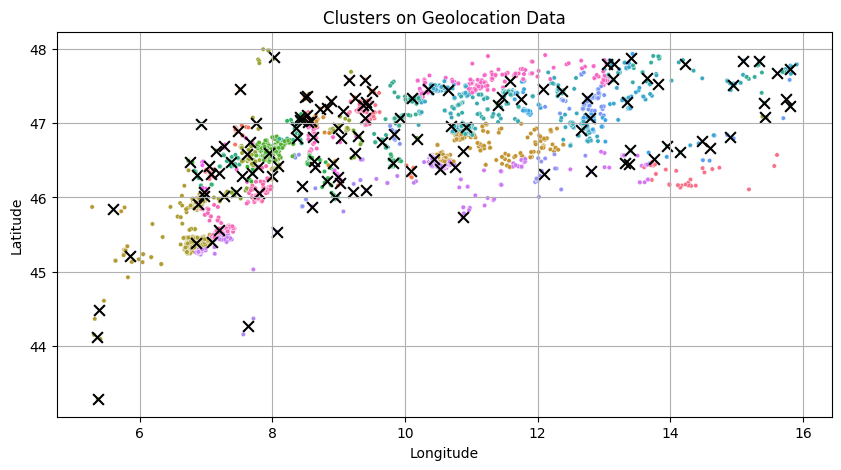

In [9]:
clusters = sorted(osm_df['cluster_label_admin2'].unique())
print("Number of classes based on administrative region:", len(clusters))
plot_clusters(osm_df, "_admin2")

Distribution based on OSM, administrative region (2)


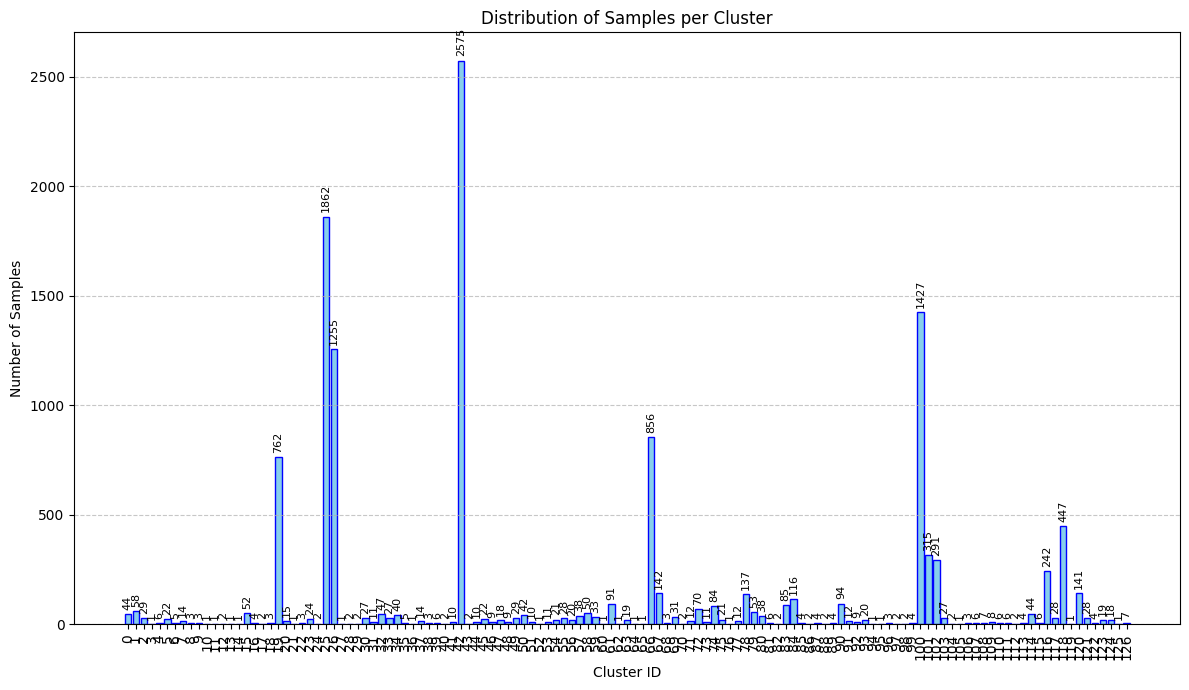

In [10]:
print("Distribution based on OSM, administrative region (2)")
plot_distribution(osm_df, spec="_admin2")

### Country

Number of classes based on country: 7


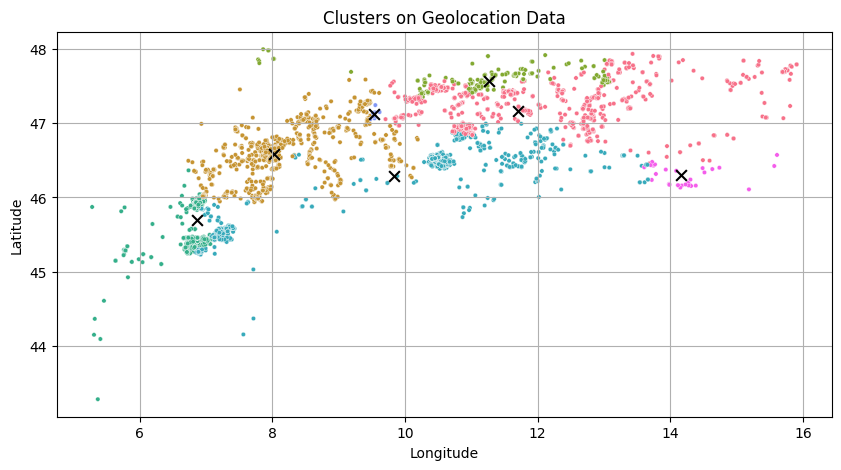

In [11]:
clusters = sorted(osm_df['cluster_label_country'].unique())
print("Number of classes based on country:", len(clusters))
plot_clusters(osm_df, "_country")

Distribution based on OSM, country


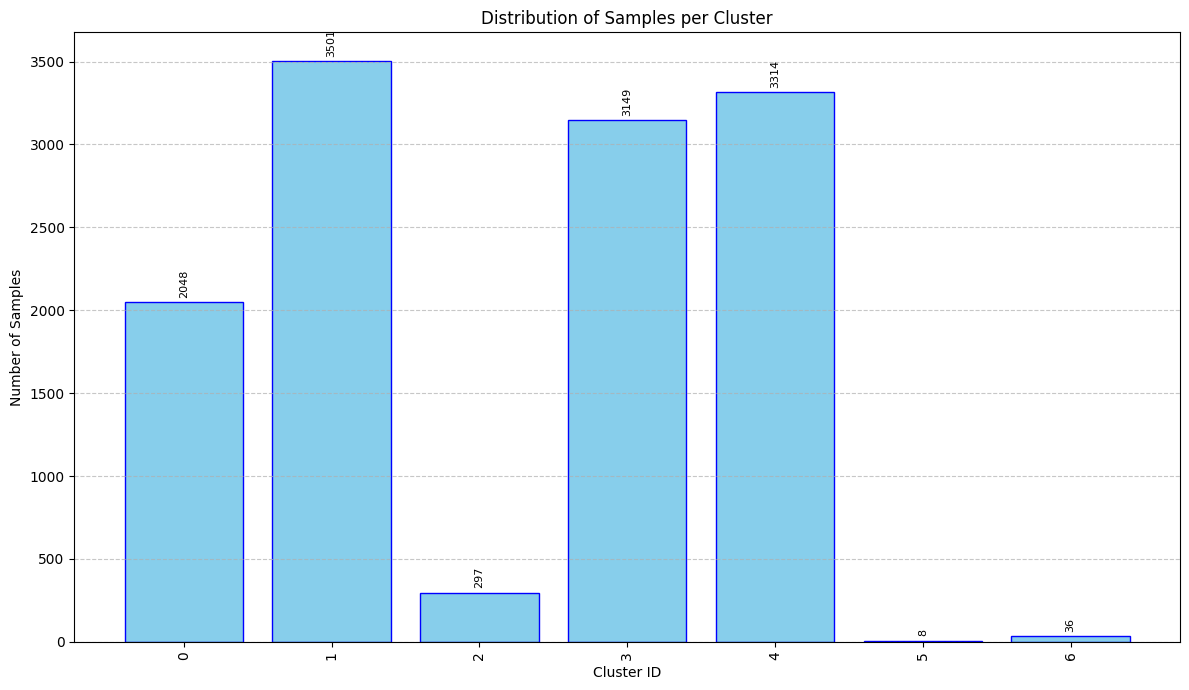

In [12]:
print("Distribution based on OSM, country")
plot_distribution(osm_df, spec="_country")

### Balanced OSM

Number of classes based on OSM and postprocessing: 62


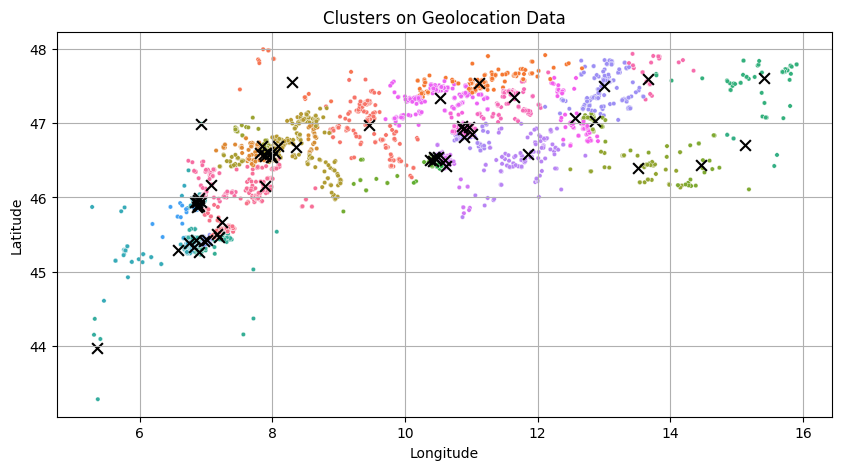

In [13]:
clusters = sorted(balanced_df['cluster_label'].unique())
print("Number of classes based on OSM and postprocessing:", len(clusters))
plot_clusters(balanced_df)

Distribution based on OSM and postprocessing


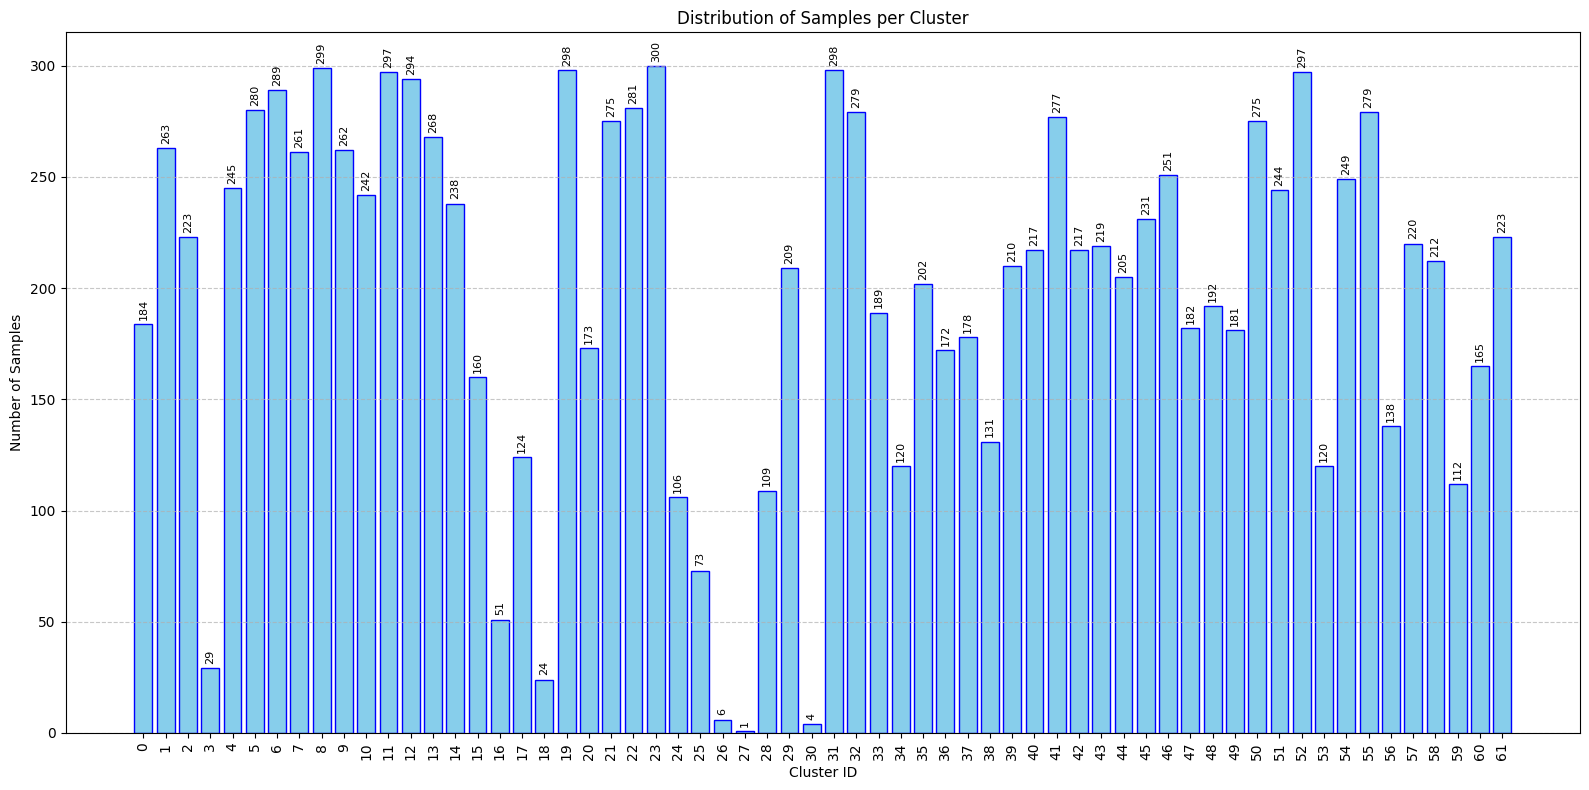

In [14]:
print("Distribution based on OSM and postprocessing")
plot_distribution(balanced_df,size=(16,8))

## Optics

Number of classes based on OPTICS: 80


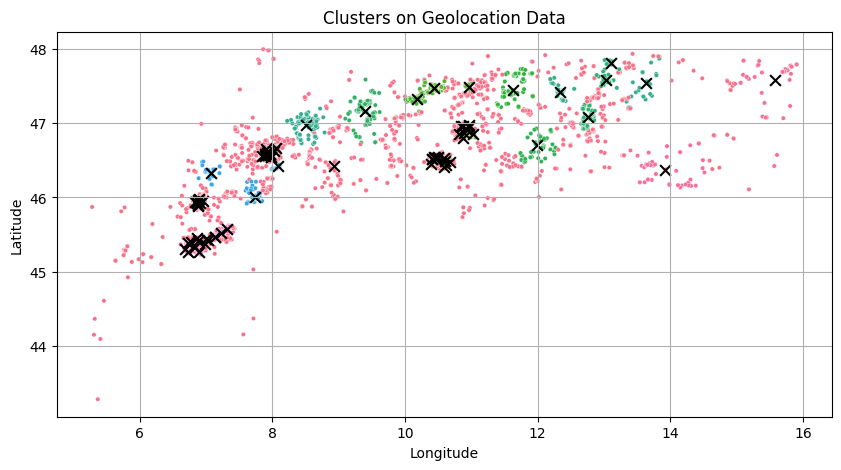

In [15]:
clusters = sorted(optics_df['cluster_label'].unique())
print("Number of classes based on OPTICS:", len(clusters))
plot_clusters(optics_df)

Distribution based on OPTICS


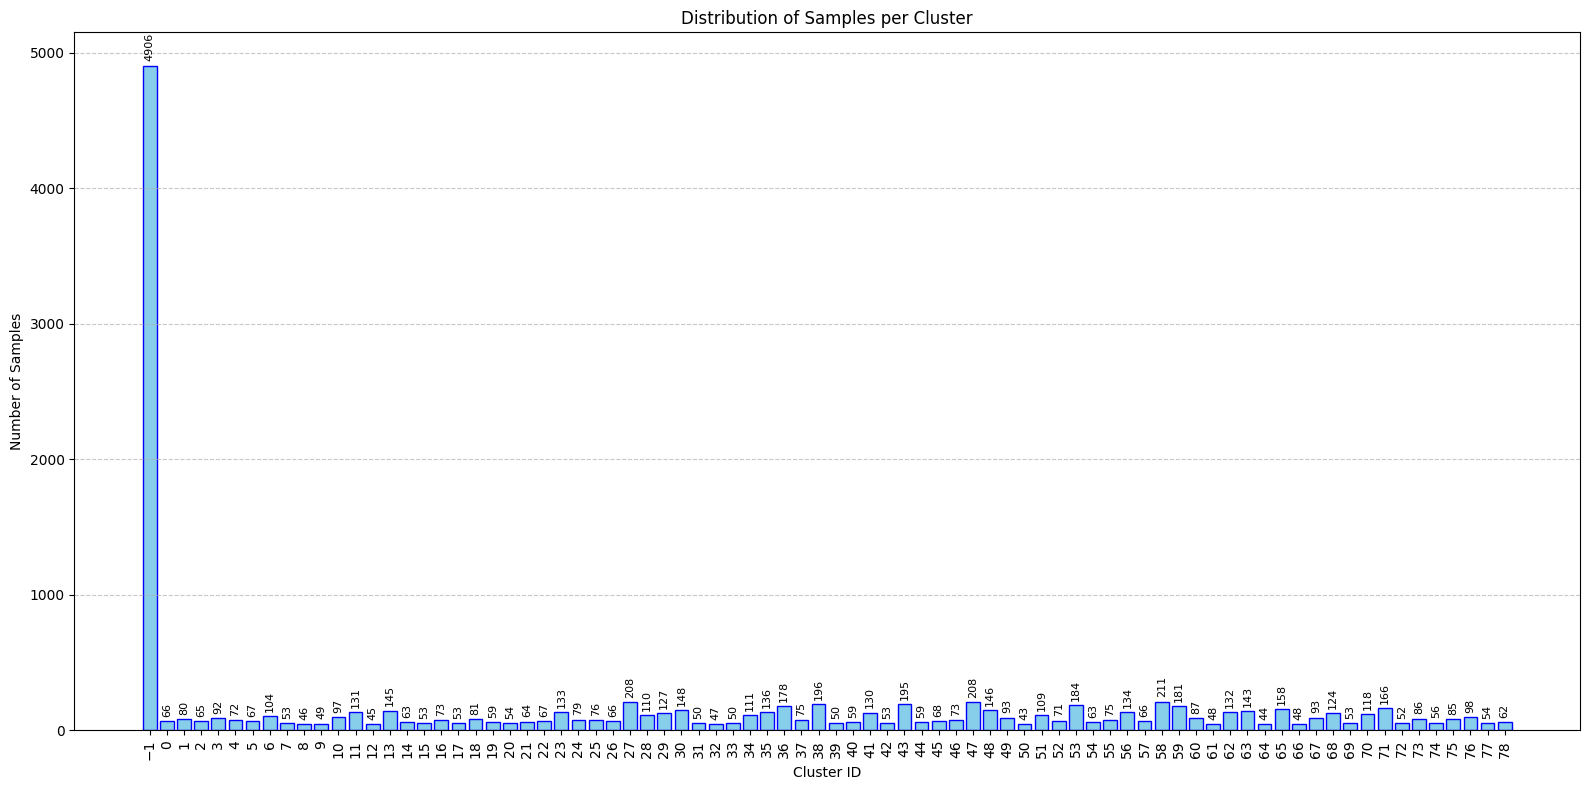

In [16]:
print("Distribution based on OPTICS")
plot_distribution(optics_df,size=(16,8))